In [10]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models




# Use this improved function in your dataset preparation logic.

def prepare_dataset(real_folder, fake_folder):
    labels = []
    features = []
    for folder, label in zip([real_folder, fake_folder], [0, 1]):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            mfccs = extract_mfcc(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(label)
    return np.array(features), np.array(labels)

# Replace these with your actual directories
real_folder = 'real'
fake_folder = 'fake'

# Preprocess the data
features, labels = prepare_dataset(real_folder, fake_folder)
features = features[..., np.newaxis] # Add a new axis for the channel

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)




In [1]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import librosa
import numpy as np
def extract_mfcc(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        if mfccs.shape[1] > max_pad_len:
            # If the MFCC is longer than our desired max, truncate it
            mfccs = mfccs[:, :max_pad_len]
        else:
            # Otherwise, pad it
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
    return mfccs
def extract_features(file_path, max_pad_len=174):
    try:
        y, sr = librosa.load(file_path)
        # Short-time features
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
        # Long-time features (MFCCs)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        if mfcc.shape[1] > max_pad_len:
            # If the MFCC is longer than our desired max, truncate it
            mfcc = mfcc[:, :max_pad_len]
        else:
            # Otherwise, pad it
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
        # Concatenate all features
        features = np.hstack((zcr, spec_cent, np.mean(mfcc, axis=1)))
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
    return features

# Use this modified function in your dataset preparation logic.


# Use this improved function in your dataset preparation logic.

def prepare_dataset(real_folder, fake_folder):
    labels = []
    features = []
    for folder, label in zip([real_folder, fake_folder], [0, 1]):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            mfccs = extract_mfcc(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(label)
    return np.array(features), np.array(labels)

# Replace these with your actual directories
real_folder = 'real'
fake_folder = 'fake'

# Preprocess the data
features, labels = prepare_dataset(real_folder, fake_folder)
features = features[..., np.newaxis] # Add a new axis for the channel

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [2]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1500, 40, 174, 1), (500, 40, 174, 1), (1500,), (500,))

In [14]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 174, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
47/47 [==============================] - 6s 112ms/step - loss: 1.8216 - accuracy: 0.5340 - val_loss: 0.6578 - val_accuracy: 0.6740
Epoch 2/20
47/47 [==============================] - 5s 110ms/step - loss: 0.6733 - accuracy: 0.5907 - val_loss: 0.7011 - val_accuracy: 0.5160
Epoch 3/20
47/47 [==============================] - 5s 111ms/step - loss: 0.6129 - accuracy: 0.6807 - val_loss: 0.5540 - val_accuracy: 0.7280
Epoch 4/20
47/47 [==============================] - 5s 103ms/step - loss: 0.5114 - accuracy: 0.7493 - val_loss: 0.4501 - val_accuracy: 0.8000
Epoch 5/20
47/47 [==============================] - 5s 103ms/step - loss: 0.4443 - accuracy: 0.8087 - val_loss: 0.5384 - val_accuracy: 0.7040
Epoch 6/20
47/47 [==============================] - 5s 102ms/step - loss: 0.3531 - accuracy: 0.8520 - val_loss: 0.3367 - val_accuracy: 0.8580
Epoch 7/20
47/47 [==============================] - 5s 103ms/step - loss: 0.4145 - accuracy: 0.8113 - val_loss: 0.4577 - val_accuracy: 0.8140
Epoch 

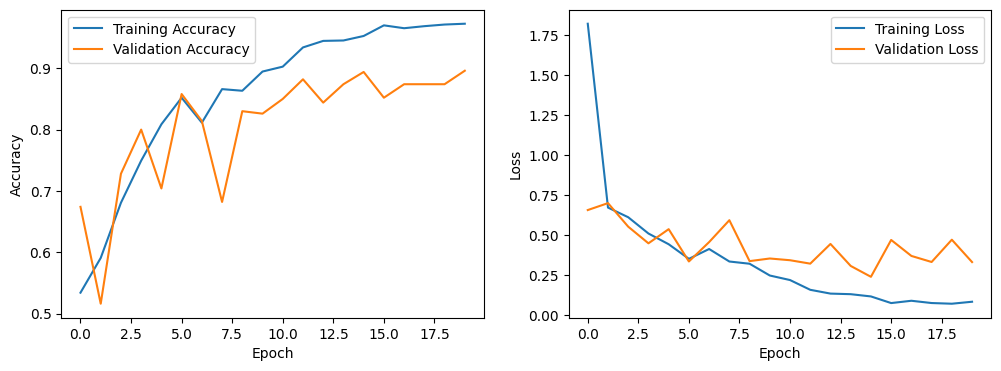

16/16 [==============================] - 0s 21ms/step


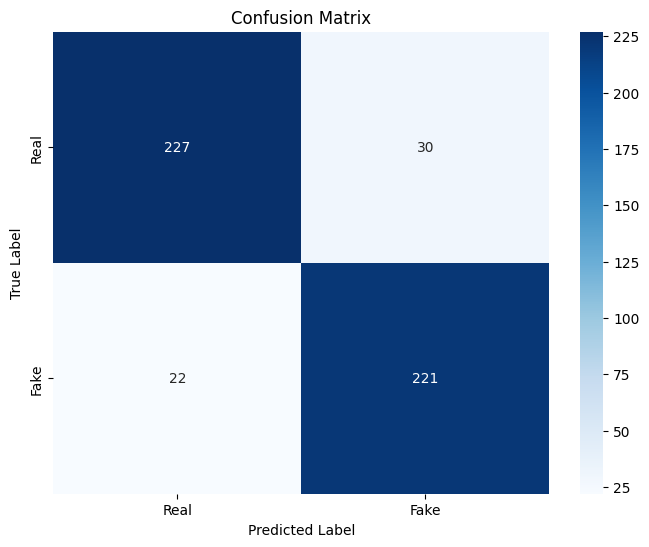

16/16 [==============================] - 0s 20ms/step - loss: 0.3329 - accuracy: 0.8960
Test accuracy: 0.8960000276565552


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [16]:
model.save("cnn.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training accuracy: 0.4826666666666667
Test accuracy: 0.52


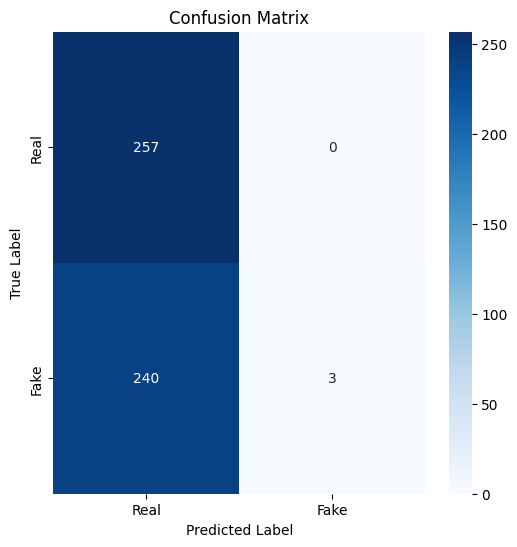

In [31]:
import os
import numpy as np
import librosa
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract MFCC features from audio files
def extract_mfcc(file_path, n_mfcc=13):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None 
    return mfccs

# Function to prepare dataset
# Function to prepare dataset
def prepare_dataset(real_folder, fake_folder, max_pad_len=174):
    labels = []
    features = []
    for folder, label in zip([real_folder, fake_folder], [0, 1]):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            mfccs = extract_mfcc(file_path)
            if mfccs is not None:
                # Pad or trim the MFCCs to a fixed length
                if mfccs.shape[1] < max_pad_len:
                    pad_width = max_pad_len - mfccs.shape[1]
                    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
                elif mfccs.shape[1] > max_pad_len:
                    mfccs = mfccs[:, :max_pad_len]
                features.append(mfccs)
                labels.append(label)
    return np.array(features), np.array(labels)


# Load and preprocess the dataset
real_folder = 'real'
fake_folder = 'fake'
features, labels = prepare_dataset(real_folder, fake_folder)

# Split the dataset with the same random state for both features and labels
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)
# Reshape the features array to be two-dimensional
n_samples, n_mfcc, n_frames = X_train.shape
X_train = X_train.reshape(n_samples, n_mfcc * n_frames)

# Repeat the same for the test set
n_samples_test, _, _ = X_test.shape
X_test = X_test.reshape(n_samples_test, n_mfcc * n_frames)

# Fit a Gaussian Mixture Model
n_components = 2  # number of mixture components
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_train)

# Predict labels
y_pred_train = gmm.predict(X_train)
y_pred_test = gmm.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')
# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


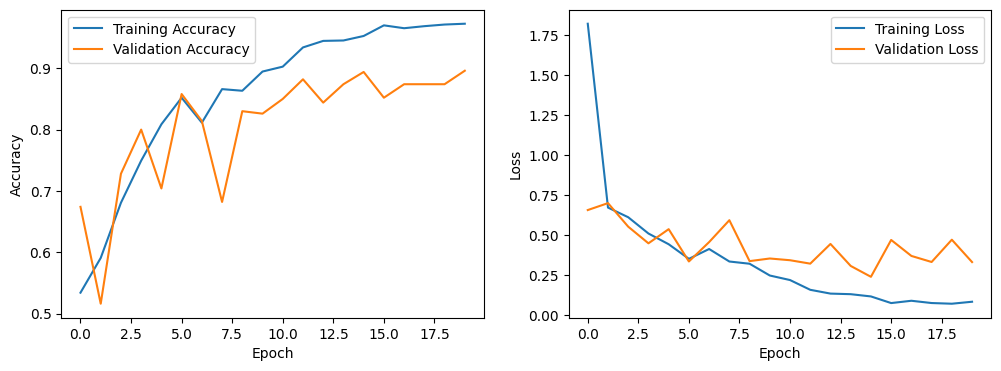

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.save("gmm.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import librosa
import numpy as np
def extract_mfcc(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        if mfccs.shape[1] > max_pad_len:
            # If the MFCC is longer than our desired max, truncate it
            mfccs = mfccs[:, :max_pad_len]
        else:
            # Otherwise, pad it
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
    return mfccs
def extract_features(file_path, max_pad_len=174):
    try:
        y, sr = librosa.load(file_path)
        # Short-time features
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
        # Long-time features (MFCCs)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        if mfcc.shape[1] > max_pad_len:
            # If the MFCC is longer than our desired max, truncate it
            mfcc = mfcc[:, :max_pad_len]
        else:
            # Otherwise, pad it
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
        # Concatenate all features
        features = np.hstack((zcr, spec_cent, np.mean(mfcc, axis=1)))
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
    return features

# Use this modified function in your dataset preparation logic.


# Use this improved function in your dataset preparation logic.

def prepare_dataset(real_folder, fake_folder):
    labels = []
    features = []
    for folder, label in zip([real_folder, fake_folder], [0, 1]):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            mfccs = extract_mfcc(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(label)
    return np.array(features), np.array(labels)

# Replace these with your actual directories
real_folder = 'real'
fake_folder = 'fake'

# Preprocess the data
features, labels = prepare_dataset(real_folder, fake_folder)
features = features[..., np.newaxis] # Add a new axis for the channel

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

Epoch 1/20
47/47 [==============================] - 5s 39ms/step - loss: 0.7200 - accuracy: 0.4940 - val_loss: 0.7133 - val_accuracy: 0.5400
Epoch 2/20
47/47 [==============================] - 1s 22ms/step - loss: 0.7052 - accuracy: 0.5507 - val_loss: 0.7046 - val_accuracy: 0.5820
Epoch 3/20
47/47 [==============================] - 1s 22ms/step - loss: 0.6839 - accuracy: 0.6073 - val_loss: 0.7025 - val_accuracy: 0.5680
Epoch 4/20
47/47 [==============================] - 1s 22ms/step - loss: 0.5964 - accuracy: 0.7300 - val_loss: 0.7291 - val_accuracy: 0.5460
Epoch 5/20
47/47 [==============================] - 1s 22ms/step - loss: 0.4655 - accuracy: 0.8140 - val_loss: 0.9112 - val_accuracy: 0.5240
Epoch 6/20
47/47 [==============================] - 1s 22ms/step - loss: 0.3684 - accuracy: 0.8647 - val_loss: 0.9852 - val_accuracy: 0.5300
Epoch 7/20
47/47 [==============================] - 1s 22ms/step - loss: 0.2347 - accuracy: 0.9293 - val_loss: 1.3908 - val_accuracy: 0.5000
Epoch 8/20
47

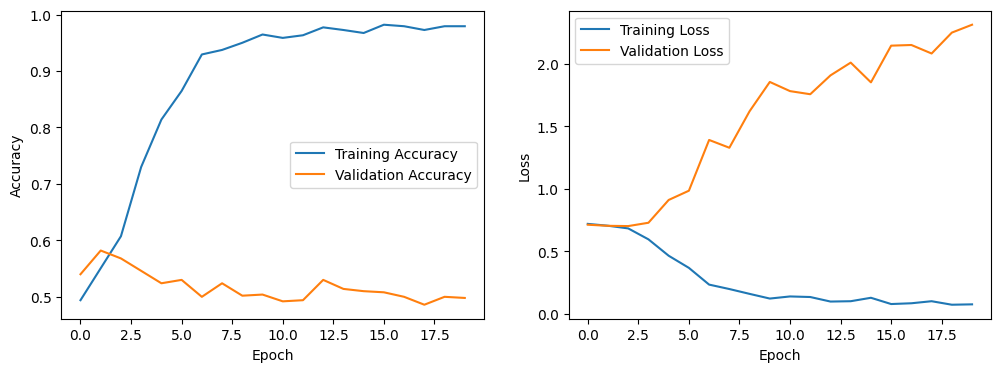

16/16 [==============================] - 1s 7ms/step


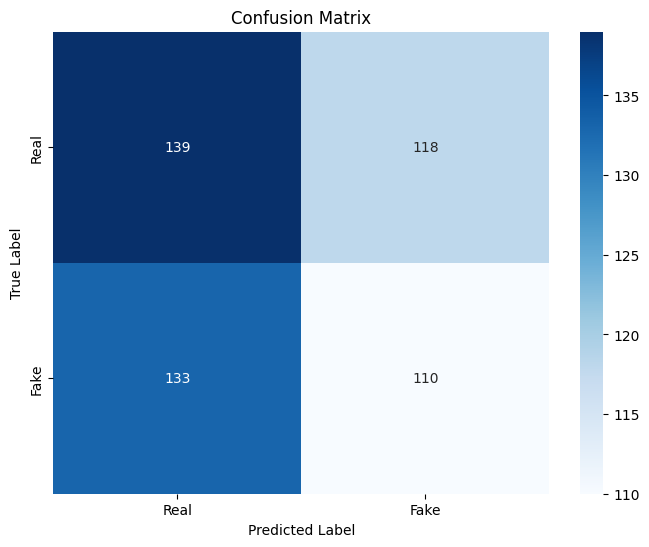

16/16 [==============================] - 0s 6ms/step - loss: 2.3119 - accuracy: 0.4980
Test accuracy: 0.49799999594688416


In [7]:
# Build the LSTM model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(40, 174)),
    layers.Dropout(0.2),
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(16),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/50
47/47 [==============================] - 208s 4s/step - loss: 5.5338 - accuracy: 0.5193 - val_loss: 0.6933 - val_accuracy: 0.4860
Epoch 2/50
47/47 [==============================] - 205s 4s/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 3/50
47/47 [==============================] - 197s 4s/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 4/50
47/47 [==============================] - 189s 4s/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 5/50
47/47 [==============================] - 189s 4s/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 6/50
47/47 [==============================] - 188s 4s/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.4860
Epoch 7/50
47/47 [==============================] - 188s 4s/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 8/50
47

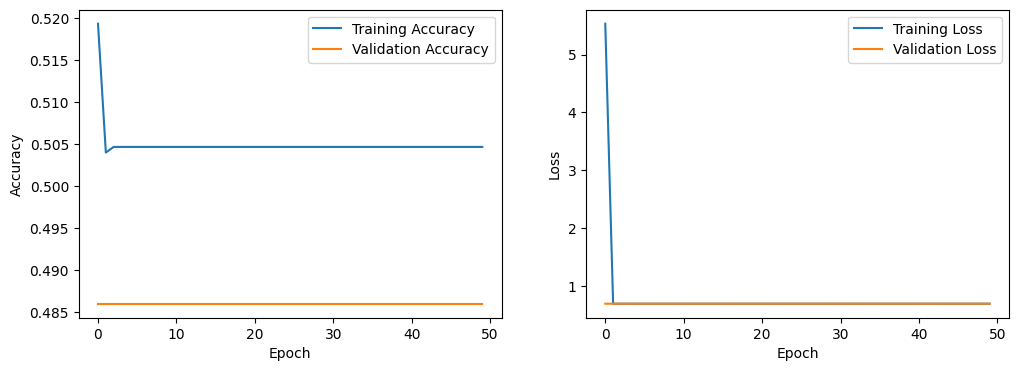

16/16 [==============================] - 22s 1s/step


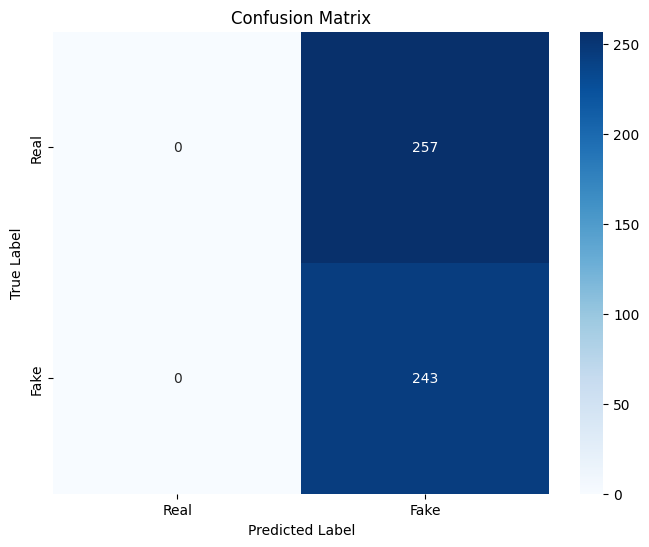

16/16 [==============================] - 21s 1s/step - loss: 0.6933 - accuracy: 0.4860
Test accuracy: 0.4860000014305115


In [13]:

# Wavenet model

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Build the WaveNet model with regularization and batch normalization
model = models.Sequential([
    layers.Input(shape=(40, 174, 1)),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=2, activation='relu'),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=4, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=8, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=16, activation='relu'),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=64, activation='relu'),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=3, padding='causal', dilation_rate=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
47/47 [==============================] - 11s 85ms/step - loss: 0.7018 - accuracy: 0.5067 - val_loss: 0.6953 - val_accuracy: 0.5260
Epoch 2/20
47/47 [==============================] - 2s 47ms/step - loss: 0.6486 - accuracy: 0.6460 - val_loss: 0.7512 - val_accuracy: 0.5260
Epoch 3/20
47/47 [==============================] - 2s 48ms/step - loss: 0.4957 - accuracy: 0.7800 - val_loss: 0.7903 - val_accuracy: 0.5400
Epoch 4/20
47/47 [==============================] - 2s 48ms/step - loss: 0.3173 - accuracy: 0.8833 - val_loss: 1.0613 - val_accuracy: 0.5160
Epoch 5/20
47/47 [==============================] - 2s 50ms/step - loss: 0.2386 - accuracy: 0.9173 - val_loss: 1.2827 - val_accuracy: 0.5240
Epoch 6/20
47/47 [==============================] - 2s 47ms/step - loss: 0.1498 - accuracy: 0.9500 - val_loss: 1.4690 - val_accuracy: 0.5140
Epoch 7/20
47/47 [==============================] - 2s 50ms/step - loss: 0.1161 - accuracy: 0.9653 - val_loss: 1.6225 - val_accuracy: 0.5080
Epoch 8/20
4

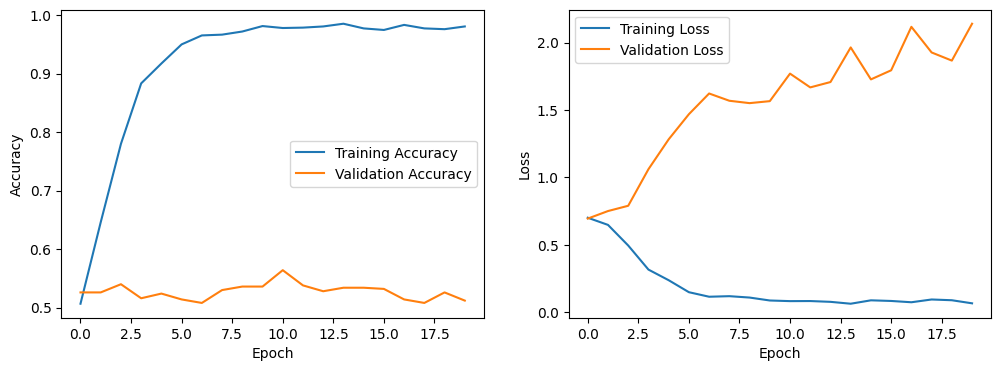

16/16 [==============================] - 2s 16ms/step


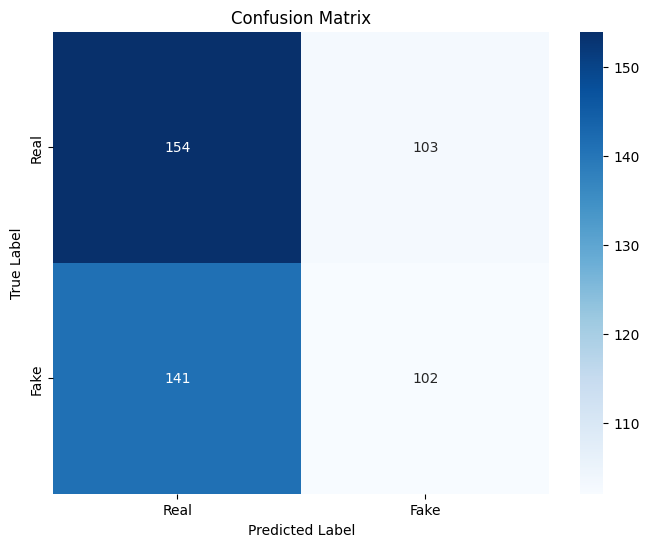

16/16 [==============================] - 0s 16ms/step - loss: 2.1396 - accuracy: 0.5120
Test accuracy: 0.5120000243186951


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)


# Build the more complex RNN model
model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128, return_sequences=True), input_shape=(40, 174)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
47/47 [==============================] - 18s 232ms/step - loss: 0.7582 - accuracy: 0.5007 - val_loss: 0.7017 - val_accuracy: 0.4860
Epoch 2/20
47/47 [==============================] - 11s 225ms/step - loss: 0.7029 - accuracy: 0.4947 - val_loss: 0.6961 - val_accuracy: 0.5140
Epoch 3/20
47/47 [==============================] - 11s 227ms/step - loss: 0.7026 - accuracy: 0.5093 - val_loss: 0.6933 - val_accuracy: 0.5140
Epoch 4/20
47/47 [==============================] - 11s 226ms/step - loss: 0.6989 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5140
Epoch 5/20
47/47 [==============================] - 10s 224ms/step - loss: 0.6950 - accuracy: 0.4907 - val_loss: 0.6937 - val_accuracy: 0.4860
Epoch 6/20
47/47 [==============================] - 11s 227ms/step - loss: 0.6964 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5140
Epoch 7/20
47/47 [==============================] - 10s 221ms/step - loss: 0.6943 - accuracy: 0.4833 - val_loss: 0.6929 - val_accuracy: 0.5140

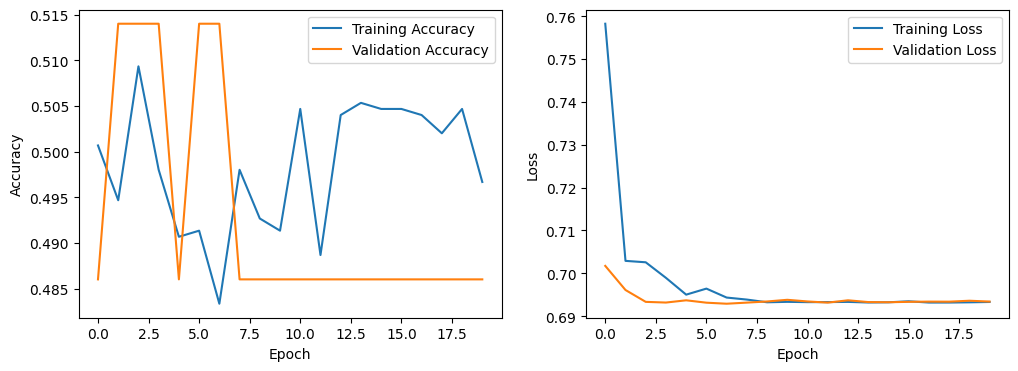

16/16 [==============================] - 1s 69ms/step


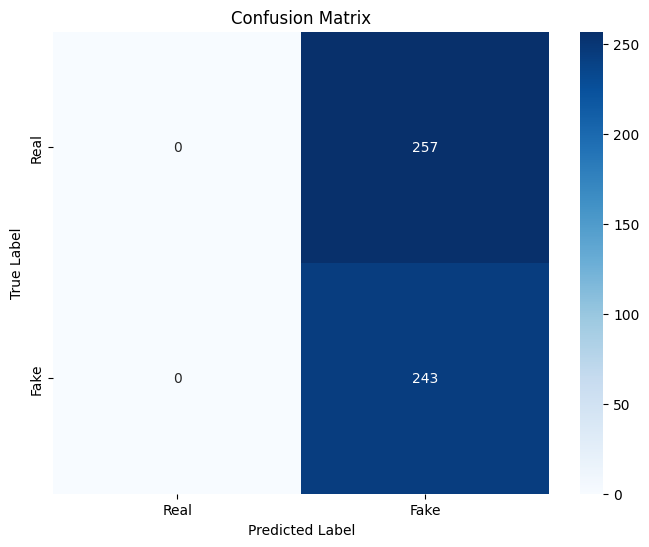

16/16 [==============================] - 1s 67ms/step - loss: 0.6934 - accuracy: 0.4860
Test accuracy: 0.4860000014305115


In [21]:
import tensorflow as tf
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Build the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = layers.MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
        x = layers.Dropout(dropout)(x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)
    
    x = layers.GlobalAveragePooling1D()(x)
    for units in mlp_units:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return models.Model(inputs, outputs)

# Example usage:
model = build_model(
    input_shape=(40, 174),
    num_transformer_blocks=8,  # Increase number of transformer blocks
    mlp_units=[256, 512],       # Add more dense layers with increased units
    dropout=0.1,                # Decrease dropout slightly
    mlp_dropout=0.1
)


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [1]:
import os
import numpy as np
import tensorflow as tf
import librosa
from tensorflow.keras.models import load_model

def extract_mfcc(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        if mfccs.shape[1] > max_pad_len:
            mfccs = mfccs[:, :max_pad_len]
        else:
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None
    return mfccs

def predict_audio_class(file_path, model_path='cnn.h5'):
    # Load the model
    model = load_model(model_path)
    
    # Extract features from the audio file
    features = extract_mfcc(file_path)
    if features is None:
        print("Could not extract features from the file")
        return None
    
    # Reshape the features to match the input shape of the model
    features = features[np.newaxis, ..., np.newaxis]
    
    # Predict the class of the audio file
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Translate the predicted class index into a meaningful label
    class_labels = ['Real', 'Fake']  # Adjust according to your classes
    predicted_label = class_labels[predicted_class[0]]
    
    return predicted_label

# Replace this with the path to your audio file
file_path = 'real\LJ002-0056.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")





1/1 [==============================] - 0s 195ms/step
Predicted class: Real


In [2]:
# Replace this with the path to your audio file
file_path = 'real\LJ002-0116.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 57ms/step
Predicted class: Real


In [3]:
# Replace this with the path to your audio file
file_path = 'real\LJ002-0200.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 54ms/step
Predicted class: Real


In [4]:
# Replace this with the path to your audio file
file_path = 'fake\LJ001-0005_gen.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 55ms/step
Predicted class: Fake


In [5]:
# Replace this with the path to your audio file
file_path = 'fake\LJ001-0058_gen.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 54ms/step
Predicted class: Fake


In [7]:
# Replace this with the path to your audio file
file_path = 'fake\LJ001-0124_gen.wav'

# Predict the class of the audio
predicted_class = predict_audio_class(file_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 54ms/step
Predicted class: Fake
